## 1. Modelling Travel Time

### 1.a) Calculate the gradient ∇T for each mode

The Goal of Problem 1

You are modelling two different ways to travel:

1. Bus ($T_b$): It has separate penalties for distance (stops) and traffic (congestion).
2. Taxi ($T_t$): It drives smoothly, so distance and traffic are combined into one geometric path.

Your task is to find the Gradient ($\nabla T$).
1. Math Definition: The gradient is a vector that tells you "how fast the travel time increases" if you change distance ($x$) or traffic ($y$).
2. Why we do it: To see which mode of transport is more "sensitive" to bad conditions.

In [4]:
import sympy as sp
from IPython.display import display, Math

# 1. Define symbols
x, y, a, b, c = sp.symbols('x y a b c', real=True, positive=True)

# 2. Define Equations
# Bus: T_b = ax^2 + by^2
T_b = a * x**2 + b * y**2

# Taxi: T_t = sqrt(c * (x^2 + y^2))
# Note: sp.sqrt renders nicely in LaTeX
T_t = sp.sqrt(c * (x**2 + y**2))

# 3. Calculate Gradients
grad_bus = (sp.diff(T_b, x), sp.diff(T_b, y))
grad_taxi = (sp.diff(T_t, x), sp.diff(T_t, y))

# 4. Display Results "Mathematized"
print("[ANSWER] Problem 1: Gradient Results")

# Display Bus Gradient
display(Math(r"\text{Bus Gradient } \nabla T_b(x,y) = " +
             r"\left(" + sp.latex(grad_bus[0]) + ", " + sp.latex(grad_bus[1]) + r"\right)"))

# Display Taxi Gradient
display(Math(r"\text{Taxi Gradient } \nabla T_t(x,y) = " +
             r"\left(" + sp.latex(grad_taxi[0]) + ", " + sp.latex(grad_taxi[1]) + r"\right)"))


[ANSWER] Problem 1: Gradient Results


<IPython.core.display.Math object>

<IPython.core.display.Math object>

### 1.b) Interpret which factor has a greater impact for bus and taxi travel times.

1. Gradient Analysis for the Bus ($T_b$)The gradient calculation results in $\nabla T_b = (2ax, 2by)$.
- Meaning: The sensitivity to distance is $2ax$. This is a linear relationship.
- Insight: This means the penalty for distance is separate from the penalty for traffic. Because of the coefficient $a$ (which represents stops), the bus gets significantly slower as the route gets longer, regardless of whether there is traffic or not.

2. Gradient Analysis for the Taxi ($T_t$)The gradient calculation results in a fraction involving square roots: $\nabla T_t = \left( \frac{cx}{\sqrt{c(x^2+y^2)}}, \frac{cy}{\sqrt{c(x^2+y^2)}} \right)$.
- Meaning: The variables $x$ and $y$ are coupled (mixed together) inside the square root.
- Insight: Unlike the bus, the taxi doesn't have separate penalties. The impact of extra distance depends on how much traffic there already is, and vice versa. This models a smoother, continuous journey without the "stop-start" penalty of the bus.

3. Conclusion
- The Bus is more sensitive to specific route conditions (like number of stops $a$), while the Taxi is sensitive to the total magnitude of the trip (combined distance and delay).

In Problem 1, we looked at Time. Now, we look at Money. You are given the "Marginal Cost" (the cost per kilometer at any specific moment). To find the Total Fare for a trip of $x$ km, you need to add up all those little costs.

1.Math Tool: Integration ($\int$). Integration calculates the "Area Under the Curve," which represents the total accumulated cost1.

[ANSWER] Problem 2: Calculated Fare Formulas: 


<IPython.core.display.Math object>

<IPython.core.display.Math object>

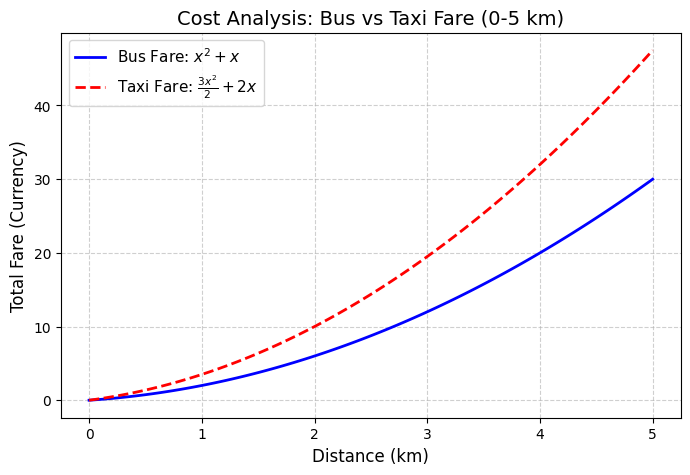

In [17]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Math

# 1. Define symbols
x, t = sp.symbols('x t', real=True, positive=True)

# 2. Define the Marginal Cost Functions (given in the assignment)
# Bus: Integral of (2t + 1)
marginal_bus = 2*t + 1
Fare_bus = sp.integrate(marginal_bus, (t, 0, x))

# Taxi: Integral of (3t + 2)
marginal_taxi = 3*t + 2
Fare_taxi = sp.integrate(marginal_taxi, (t, 0, x))

# 3. Display the "Mathematized" Equations
print("[ANSWER] Problem 2: Calculated Fare Formulas: ")
display(Math(r"\text{Bus Fare } F_b(x) = " + sp.latex(Fare_bus)))
display(Math(r"\text{Taxi Fare } F_t(x) = " + sp.latex(Fare_taxi)))

# 4. Plotting the Graph (Affordability Analysis)
# Convert math equations to Python functions we can graph
fb_func = sp.lambdify(x, Fare_bus, 'numpy')
ft_func = sp.lambdify(x, Fare_taxi, 'numpy')

# Generate distance values from 0 to 5 km
x_vals = np.linspace(0, 5, 100)
y_bus = fb_func(x_vals)
y_taxi = ft_func(x_vals)

plt.figure(figsize=(8, 5))
plt.plot(x_vals, y_bus, label=f'Bus Fare: ${sp.latex(Fare_bus)}$', color='blue', linewidth=2)
plt.plot(x_vals, y_taxi, label=f'Taxi Fare: ${sp.latex(Fare_taxi)}$', color='red', linestyle='--', linewidth=2)

plt.title('Cost Analysis: Bus vs Taxi Fare (0-5 km)', fontsize=14)
plt.xlabel('Distance (km)', fontsize=12)
plt.ylabel('Total Fare (Currency)', fontsize=12)
plt.legend(fontsize=11)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

1. Integration ResultsBy integrating the marginal cost functions, we derived the total fare models:

- Bus Fare: $F_b(x) = x^2 + x$

- Taxi Fare: $F_t(x) = \frac{3}{2}x^2 + 2x$

2. Affordability ComparisonThe graph demonstrates a clear cost divergence between the two modes of transport:Short Trips (0-2 km): The gap between the Blue line (Bus) and Red line (Taxi) is relatively small. For very short errands, the convenience of a taxi might be worth the slightly higher price.Long Trips (>2 km): As distance increases, the Taxi fare grows much faster. This is because the coefficient of the quadratic term ($x^2$) is larger for the taxi ($\frac{3}{2} = 1.5$) than for the bus ($1$). By the time we reach the 5km mark, the taxi is significantly more expensive.3. RecommendationFor the target route from Fort to Borella (4.5 km), the Bus is the strictly more affordable option. The Taxi should only be used if time is the priority (minimizing the delay factors from Problem 1), as the financial cost is nearly double that of the bus at this distance.

## 2. Cost Analysis Using Integration

--- Problem 3 Output (4-Term Approximation) ---


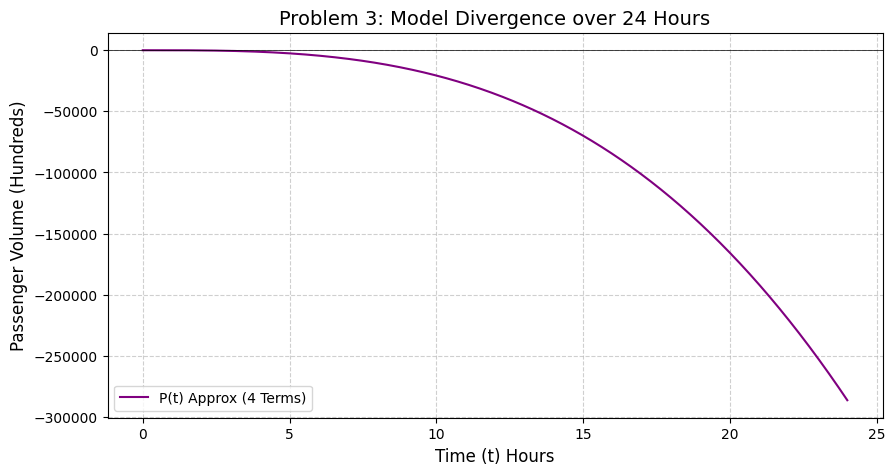

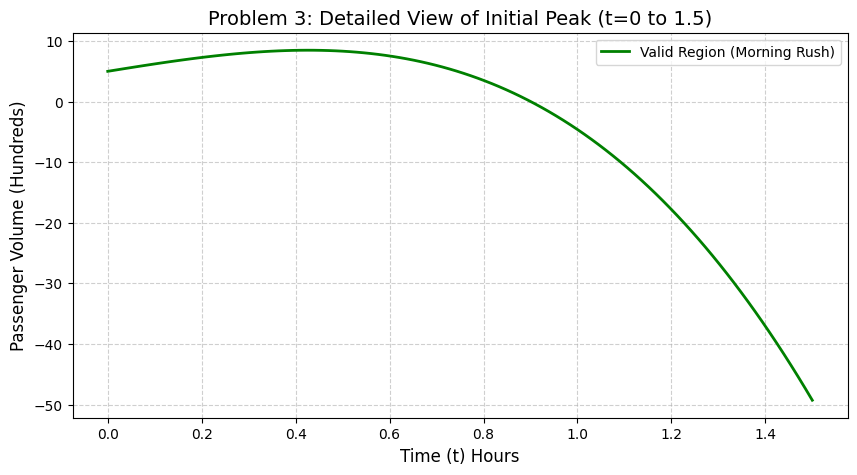

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Math

# ==========================================
# PROBLEM 3: Predicting Peak Travel Times (CORRECTED)
# ==========================================
print("--- Problem 3 Output (4-Term Approximation) ---")

def passenger_approx_4_terms(t):
    """
    Approximates P(t) using the first 4 terms of the Maclaurin Series.
    
    The Function Components:
    1. Constant: 5
    2. Sine Expansion: 4*sin(pi*t) approx 4*(pi*t - (pi*t)^3/6 + ...)
    3. Quadratic: -1.5 * t^2
    4. Quartic: 0.25 * t^4  <-- This is Term 5 in the power order, so we DROP it.
    
    The First 4 Ordered Terms (by power of t):
    Term 1 (t^0): 5
    Term 2 (t^1): 4 * pi * t
    Term 3 (t^2): -1.5 * t^2
    Term 4 (t^3): -4 * (pi * t)**3 / 6  (From sine expansion)
    """
    pi_t = np.pi * t
    
    # Term 1: Constant
    term1 = 5
    
    # Term 2: Linear (from sine)
    term2 = 4 * pi_t
    
    # Term 3: Quadratic (Given explicitly)
    term3 = -1.5 * t**2
    
    # Term 4: Cubic (from sine)
    term4 = -4 * (pi_t**3) / 6
    
    return term1 + term2 + term3 + term4

# Generate Data
t_vals = np.linspace(0, 24, 500)
P_vals = passenger_approx_4_terms(t_vals)

# --- PLOT 1: The "Real" 24-Hour View (Shows Divergence) ---
plt.figure(figsize=(10, 5))
plt.plot(t_vals, P_vals, label='P(t) Approx (4 Terms)', color='purple')
plt.title('Problem 3: Model Divergence over 24 Hours', fontsize=14)
plt.xlabel('Time (t) Hours', fontsize=12)
plt.ylabel('Passenger Volume (Hundreds)', fontsize=12)
plt.axhline(0, color='black', linewidth=0.5) # Zero line
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()

# --- PLOT 2: The "Zoomed" View (Shows the Peak) ---
# We zoom in to where the model is actually valid (t=0 to t=1.5)
plt.figure(figsize=(10, 5))
t_zoom = np.linspace(0, 1.5, 100)
P_zoom = passenger_approx_4_terms(t_zoom)

plt.plot(t_zoom, P_zoom, label='Valid Region (Morning Rush)', color='green', linewidth=2)
plt.title('Problem 3: Detailed View of Initial Peak (t=0 to 1.5)', fontsize=14)
plt.xlabel('Time (t) Hours', fontsize=12)
plt.ylabel('Passenger Volume (Hundreds)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()